In [1]:
# librerias

import pandas as pd
pd.set_option('display.max_columns', None)


import numpy as np

import warnings
warnings.filterwarnings('ignore')

# pa pintar
import seaborn as sns
import matplotlib.pyplot as plt

# para que salga el grafica
%matplotlib inline

In [2]:
muestra = pd.read_csv('./predicting-airbnb-prices/muestra.csv')
muestra.head()

,id,log_price
0,0,1.68677
1,1,8.01927
2,2,4.94568
3,3,7.51119
4,4,9.80191


In [3]:
test = pd.read_csv('./predicting-airbnb-prices/test.csv')
test.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,20332537,Condominium,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",6,2.5,Real Bed,moderate,True,LA,Spacious and quiet master bedroom and two bedr...,2016-03-23,t,t,100%,2014-08-23,f,2017-02-18,34.087167,-118.122115,Cozy Condominium,Alhambra,7,93.0,https://a0.muscache.com/im/pictures/62134148-b...,91801,3.0,4.0
1,10653901,Apartment,Entire home/apt,"{TV,""Wireless Internet"",Kitchen,""Indoor firepl...",4,1.5,Real Bed,moderate,True,LA,"Hip Venice loft with 20 foot ceilings, plenty ...",2013-08-16,t,t,100%,2012-08-18,f,2017-04-18,33.994951,-118.467552,"AK Venice Loft, Roof deck, yard, bikes @ 21 Palms",Venice,50,97.0,NaN,90291,1.0,1.0
2,21173707,Dorm,Shared room,"{Internet,""Wireless Internet"",Kitchen,Heating,...",1,NaN,Real Bed,strict,False,SF,My home is very communal. Students and interns...,2012-07-04,t,f,100%,2011-05-10,f,2017-09-22,37.794184,-122.405819,Shelli's Student Home4(1 Month Min),Chinatown,6,100.0,https://a0.muscache.com/im/pictures/5676690/30...,94108,1.0,1.0
3,16861419,Apartment,Private room,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...",2,1.0,Real Bed,flexible,False,SF,Large and comfortable extra bedroom in large 3...,NaN,t,t,NaN,2013-10-12,f,NaN,37.775893,-122.425973,Large bedroom in Hayes Valley,Hayes Valley,0,NaN,https://a0.muscache.com/im/pictures/a201a661-a...,94102,1.0,1.0
4,16411627,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,moderate,True,Boston,"Centrally located to all Universities, Hospita...",2013-10-07,t,t,100%,2011-06-13,f,2017-10-05,42.348399,-71.156963,Large 1Bed w/ Gorgeous Kitchen + Bath,Allston-Brighton,49,87.0,https://a0.muscache.com/im/pictures/27186847/d...,02135,1.0,2.0


In [4]:
test.shape

(14823, 28)

In [5]:
test.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [6]:
nan_cols = test.isna().sum()
nan_cols[nan_cols>0]

bathrooms                   51
first_review              3177
host_has_profile_pic        48
host_identity_verified      48
host_response_rate        3671
host_since                  48
last_review               3167
neighbourhood             1349
review_scores_rating      3356
thumbnail_url             1594
zipcode                    211
bedrooms                    14
beds                        31
dtype: int64

In [7]:
# lleno los valores nulos con la mediana

test['bathrooms'].fillna(test['bathrooms'].median(), inplace=True)
test['bedrooms'].fillna(test['bedrooms'].median(), inplace=True)
test['beds'].fillna(test['beds'].median(), inplace=True)

In [8]:
nan_cols = test.isna().sum()
nan_cols[nan_cols>0]

first_review              3177
host_has_profile_pic        48
host_identity_verified      48
host_response_rate        3671
host_since                  48
last_review               3167
neighbourhood             1349
review_scores_rating      3356
thumbnail_url             1594
zipcode                    211
dtype: int64

In [9]:
test.shape

(14823, 28)

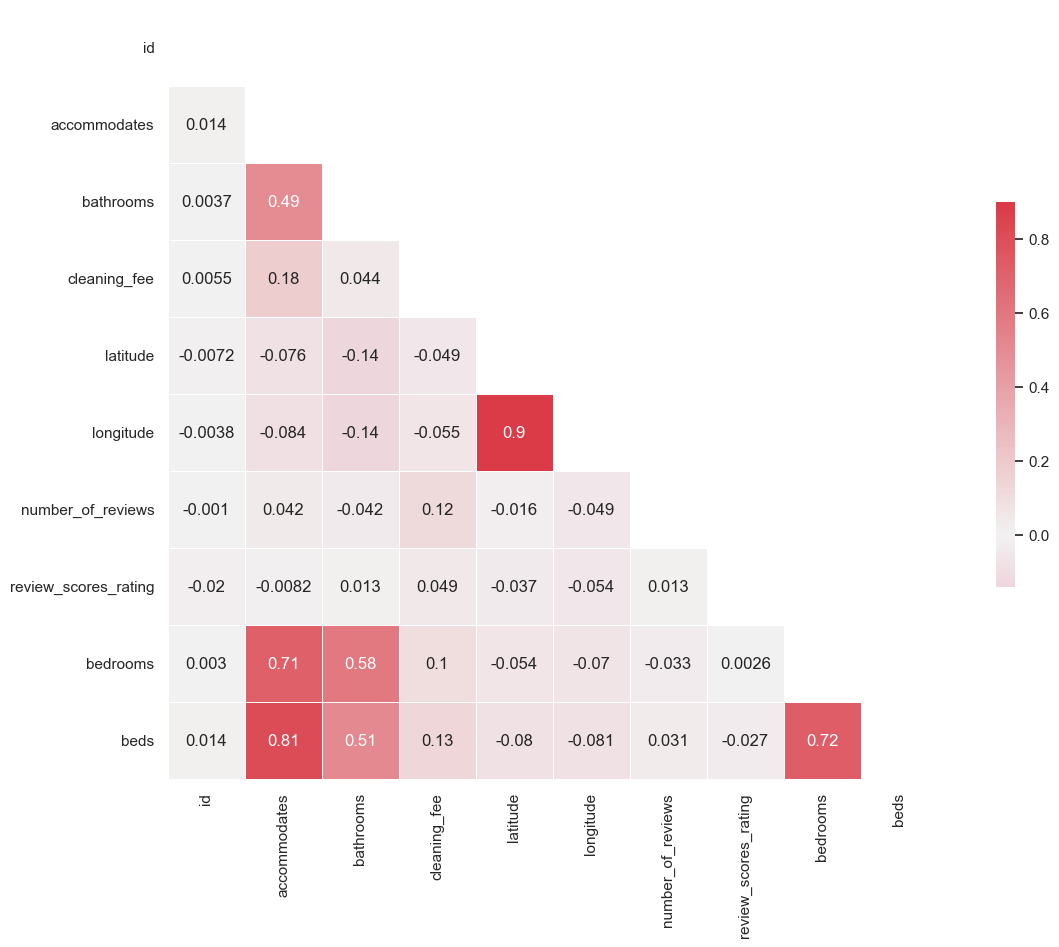

In [10]:
plt.figure(figsize=(15, 10))   # 150x100 pixeles

sns.set(style='white')    # estilo blanco

mask=np.triu(np.ones_like(test.corr(), dtype=bool))    # mascara para tapar lo de arriba

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de  colores


sns.heatmap(test.corr(),    
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [11]:
corr_price = test.corr()['accommodates']
corr_price

id                      0.013777
accommodates            1.000000
bathrooms               0.491723
cleaning_fee            0.178039
latitude               -0.075725
longitude              -0.083773
number_of_reviews       0.041733
review_scores_rating   -0.008222
bedrooms                0.709670
beds                    0.809640
Name: accommodates, dtype: float64

### 2. Codificación de Variables Categóricas:

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14823 entries, 0 to 14822
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      14823 non-null  int64  
 1   property_type           14823 non-null  object 
 2   room_type               14823 non-null  object 
 3   amenities               14823 non-null  object 
 4   accommodates            14823 non-null  int64  
 5   bathrooms               14823 non-null  float64
 6   bed_type                14823 non-null  object 
 7   cancellation_policy     14823 non-null  object 
 8   cleaning_fee            14823 non-null  bool   
 9   city                    14823 non-null  object 
 10  description             14823 non-null  object 
 11  first_review            11646 non-null  object 
 12  host_has_profile_pic    14775 non-null  object 
 13  host_identity_verified  14775 non-null  object 
 14  host_response_rate      11152 non-null

In [13]:
test['room_type'].unique()

array(['Entire home/apt', 'Shared room', 'Private room'], dtype=object)

In [14]:
# Aplica one-hot encoding a la variable 'room_type'
test = pd.get_dummies(test, columns=['room_type'], prefix='room_type')
test.head()

,id,property_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,20332537,Condominium,"{TV,Internet,""Wireless Internet"",""Air conditio...",6,2.5,Real Bed,moderate,True,LA,Spacious and quiet master bedroom and two bedr...,2016-03-23,t,t,100%,2014-08-23,f,2017-02-18,34.087167,-118.122115,Cozy Condominium,Alhambra,7,93.0,https://a0.muscache.com/im/pictures/62134148-b...,91801,3.0,4.0,1,0,0
1,10653901,Apartment,"{TV,""Wireless Internet"",Kitchen,""Indoor firepl...",4,1.5,Real Bed,moderate,True,LA,"Hip Venice loft with 20 foot ceilings, plenty ...",2013-08-16,t,t,100%,2012-08-18,f,2017-04-18,33.994951,-118.467552,"AK Venice Loft, Roof deck, yard, bikes @ 21 Palms",Venice,50,97.0,NaN,90291,1.0,1.0,1,0,0
2,21173707,Dorm,"{Internet,""Wireless Internet"",Kitchen,Heating,...",1,1.0,Real Bed,strict,False,SF,My home is very communal. Students and interns...,2012-07-04,t,f,100%,2011-05-10,f,2017-09-22,37.794184,-122.405819,Shelli's Student Home4(1 Month Min),Chinatown,6,100.0,https://a0.muscache.com/im/pictures/5676690/30...,94108,1.0,1.0,0,0,1
3,16861419,Apartment,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...",2,1.0,Real Bed,flexible,False,SF,Large and comfortable extra bedroom in large 3...,NaN,t,t,NaN,2013-10-12,f,NaN,37.775893,-122.425973,Large bedroom in Hayes Valley,Hayes Valley,0,NaN,https://a0.muscache.com/im/pictures/a201a661-a...,94102,1.0,1.0,0,1,0
4,16411627,House,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,moderate,True,Boston,"Centrally located to all Universities, Hospita...",2013-10-07,t,t,100%,2011-06-13,f,2017-10-05,42.348399,-71.156963,Large 1Bed w/ Gorgeous Kitchen + Bath,Allston-Brighton,49,87.0,https://a0.muscache.com/im/pictures/27186847/d...,02135,1.0,2.0,1,0,0


In [15]:
test['bed_type'].unique()

array(['Real Bed', 'Futon', 'Airbed', 'Pull-out Sofa', 'Couch'],
      dtype=object)

In [16]:
test['property_type'].unique()

# Veo que son muchas columnas únicas y que teniendo la columna 'room_type', puede sobrarnos como dato. LA ELIMINO. 

array(['Condominium', 'Apartment', 'Dorm', 'House', 'Loft', 'Townhouse',
       'Boat', 'Guesthouse', 'Bungalow', 'Bed & Breakfast', 'Other',
       'Guest suite', 'Boutique hotel', 'Timeshare', 'Hut', 'Castle',
       'Yurt', 'Villa', 'Cabin', 'Camper/RV', 'In-law', 'Hostel',
       'Serviced apartment', 'Vacation home', 'Chalet', 'Tent',
       'Parking Space', 'Treehouse'], dtype=object)

In [17]:
# Elimina la columna 'property_type'

test = test.drop('property_type', axis=1)

In [18]:
test['cancellation_policy'].unique()

# haré una fusión en la que cambio 'super_strict_30' y 'super_strict_60'

array(['moderate', 'strict', 'flexible', 'super_strict_30',
       'super_strict_60'], dtype=object)

In [19]:
# Fusiono categorías

test['cancellation_policy'] = test['cancellation_policy'].replace(['super_strict_30', 'super_strict_60'], 'super_strict')

# Verifica los cambios
test['cancellation_policy'].unique()

array(['moderate', 'strict', 'flexible', 'super_strict'], dtype=object)

In [20]:
# Aplica one-hot encoding a la variable 'room_type'
test = pd.get_dummies(test, columns=['cancellation_policy'], prefix='cancellation_policy')
test.head()

,id,amenities,accommodates,bathrooms,bed_type,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict
0,20332537,"{TV,Internet,""Wireless Internet"",""Air conditio...",6,2.5,Real Bed,True,LA,Spacious and quiet master bedroom and two bedr...,2016-03-23,t,t,100%,2014-08-23,f,2017-02-18,34.087167,-118.122115,Cozy Condominium,Alhambra,7,93.0,https://a0.muscache.com/im/pictures/62134148-b...,91801,3.0,4.0,1,0,0,0,1,0,0
1,10653901,"{TV,""Wireless Internet"",Kitchen,""Indoor firepl...",4,1.5,Real Bed,True,LA,"Hip Venice loft with 20 foot ceilings, plenty ...",2013-08-16,t,t,100%,2012-08-18,f,2017-04-18,33.994951,-118.467552,"AK Venice Loft, Roof deck, yard, bikes @ 21 Palms",Venice,50,97.0,NaN,90291,1.0,1.0,1,0,0,0,1,0,0
2,21173707,"{Internet,""Wireless Internet"",Kitchen,Heating,...",1,1.0,Real Bed,False,SF,My home is very communal. Students and interns...,2012-07-04,t,f,100%,2011-05-10,f,2017-09-22,37.794184,-122.405819,Shelli's Student Home4(1 Month Min),Chinatown,6,100.0,https://a0.muscache.com/im/pictures/5676690/30...,94108,1.0,1.0,0,0,1,0,0,1,0
3,16861419,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...",2,1.0,Real Bed,False,SF,Large and comfortable extra bedroom in large 3...,NaN,t,t,NaN,2013-10-12,f,NaN,37.775893,-122.425973,Large bedroom in Hayes Valley,Hayes Valley,0,NaN,https://a0.muscache.com/im/pictures/a201a661-a...,94102,1.0,1.0,0,1,0,1,0,0,0
4,16411627,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,True,Boston,"Centrally located to all Universities, Hospita...",2013-10-07,t,t,100%,2011-06-13,f,2017-10-05,42.348399,-71.156963,Large 1Bed w/ Gorgeous Kitchen + Bath,Allston-Brighton,49,87.0,https://a0.muscache.com/im/pictures/27186847/d...,02135,1.0,2.0,1,0,0,0,1,0,0


In [21]:
# Aplica one-hot encoding a la variable 'room_type'

test = pd.get_dummies(test, columns=['bed_type'], prefix='bed_type')
test.head()

,id,amenities,accommodates,bathrooms,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,20332537,"{TV,Internet,""Wireless Internet"",""Air conditio...",6,2.5,True,LA,Spacious and quiet master bedroom and two bedr...,2016-03-23,t,t,100%,2014-08-23,f,2017-02-18,34.087167,-118.122115,Cozy Condominium,Alhambra,7,93.0,https://a0.muscache.com/im/pictures/62134148-b...,91801,3.0,4.0,1,0,0,0,1,0,0,0,0,0,0,1
1,10653901,"{TV,""Wireless Internet"",Kitchen,""Indoor firepl...",4,1.5,True,LA,"Hip Venice loft with 20 foot ceilings, plenty ...",2013-08-16,t,t,100%,2012-08-18,f,2017-04-18,33.994951,-118.467552,"AK Venice Loft, Roof deck, yard, bikes @ 21 Palms",Venice,50,97.0,NaN,90291,1.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1
2,21173707,"{Internet,""Wireless Internet"",Kitchen,Heating,...",1,1.0,False,SF,My home is very communal. Students and interns...,2012-07-04,t,f,100%,2011-05-10,f,2017-09-22,37.794184,-122.405819,Shelli's Student Home4(1 Month Min),Chinatown,6,100.0,https://a0.muscache.com/im/pictures/5676690/30...,94108,1.0,1.0,0,0,1,0,0,1,0,0,0,0,0,1
3,16861419,"{TV,Internet,""Wireless Internet"",Kitchen,Heati...",2,1.0,False,SF,Large and comfortable extra bedroom in large 3...,NaN,t,t,NaN,2013-10-12,f,NaN,37.775893,-122.425973,Large bedroom in Hayes Valley,Hayes Valley,0,NaN,https://a0.muscache.com/im/pictures/a201a661-a...,94102,1.0,1.0,0,1,0,1,0,0,0,0,0,0,0,1
4,16411627,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,True,Boston,"Centrally located to all Universities, Hospita...",2013-10-07,t,t,100%,2011-06-13,f,2017-10-05,42.348399,-71.156963,Large 1Bed w/ Gorgeous Kitchen + Bath,Allston-Brighton,49,87.0,https://a0.muscache.com/im/pictures/27186847/d...,02135,1.0,2.0,1,0,0,0,1,0,0,0,0,0,0,1


In [22]:
# A la columna 'host_response_rate' le elimino % para tener una columna numérica.

In [23]:
test['host_response_rate'] = test['host_response_rate'].str.rstrip('%').astype('float') / 100.0

In [24]:
# A la columna 'review_scores_rating' la cambio a una columna numérica.

test['review_scores_rating'] = test['review_scores_rating'].astype(float)

In [25]:
test.shape

(14823, 36)

In [26]:
test['host_response_rate'].head()

0    1.0
1    1.0
2    1.0
3    NaN
4    1.0
Name: host_response_rate, dtype: float64

In [27]:
# Relleno ahora los nulos de la columna con "0"

test['host_response_rate'].fillna('0', inplace=True)

In [28]:
# Convierto la columna a tipo float

test['host_response_rate'] = test['host_response_rate'].astype(float)

In [29]:
test['host_response_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14823 entries, 0 to 14822
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
14823 non-null  float64
dtypes: float64(1)
memory usage: 115.9 KB


In [30]:
test['bathrooms'] = test['bathrooms'].astype(int)

In [31]:
test.dtypes

id                                    int64
amenities                            object
accommodates                          int64
bathrooms                             int64
cleaning_fee                           bool
city                                 object
description                          object
first_review                         object
host_has_profile_pic                 object
host_identity_verified               object
host_response_rate                  float64
host_since                           object
instant_bookable                     object
last_review                          object
latitude                            float64
longitude                           float64
name                                 object
neighbourhood                        object
number_of_reviews                     int64
review_scores_rating                float64
thumbnail_url                        object
zipcode                              object
bedrooms                        

- Elimino aquellas columnas categóricas que me interrumpen y que no me van a servir para el estudio del precio:
    - 'thumbnail_url', 'zipcode', 'amenities', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified,'host_since', 'last_review', 'name', 'neighbourhood', 'cleaning_fee'.

In [32]:
columns_to_drop = ['thumbnail_url', 'zipcode', 'amenities', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_since', 'last_review', 'name', 'neighbourhood', 'cleaning_fee']
test = test.drop(columns=columns_to_drop)

In [33]:
test.head()

,id,accommodates,bathrooms,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,20332537,6,2,1.0,f,34.087167,-118.122115,7,93.0,3.0,4.0,1,0,0,0,1,0,0,0,0,0,0,1
1,10653901,4,1,1.0,f,33.994951,-118.467552,50,97.0,1.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1
2,21173707,1,1,1.0,f,37.794184,-122.405819,6,100.0,1.0,1.0,0,0,1,0,0,1,0,0,0,0,0,1
3,16861419,2,1,0.0,f,37.775893,-122.425973,0,NaN,1.0,1.0,0,1,0,1,0,0,0,0,0,0,0,1
4,16411627,4,1,1.0,f,42.348399,-71.156963,49,87.0,1.0,2.0,1,0,0,0,1,0,0,0,0,0,0,1


In [34]:
test['instant_bookable'].value_counts()

f    10855
t     3968
Name: instant_bookable, dtype: int64

In [35]:
test['instant_bookable'] = test['instant_bookable'].map({'f': 0, 't': 1})

In [36]:
test['instant_bookable'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14823 entries, 0 to 14822
Series name: instant_bookable
Non-Null Count  Dtype
--------------  -----
14823 non-null  int64
dtypes: int64(1)
memory usage: 115.9 KB


In [37]:
test['instant_bookable'].value_counts()

0    10855
1     3968
Name: instant_bookable, dtype: int64

In [38]:
test.dtypes

id                                    int64
accommodates                          int64
bathrooms                             int64
host_response_rate                  float64
instant_bookable                      int64
latitude                            float64
longitude                           float64
number_of_reviews                     int64
review_scores_rating                float64
bedrooms                            float64
beds                                float64
room_type_Entire home/apt             uint8
room_type_Private room                uint8
room_type_Shared room                 uint8
cancellation_policy_flexible          uint8
cancellation_policy_moderate          uint8
cancellation_policy_strict            uint8
cancellation_policy_super_strict      uint8
bed_type_Airbed                       uint8
bed_type_Couch                        uint8
bed_type_Futon                        uint8
bed_type_Pull-out Sofa                uint8
bed_type_Real Bed               

In [39]:
test.shape

(14823, 23)

### VALORES NULOS

In [40]:
nan_cols = test.isna().sum()
nan_cols[nan_cols>0]

review_scores_rating    3356
dtype: int64

In [41]:
corr_price = test.corr()['accommodates']
corr_price

id                                  0.013777
accommodates                        1.000000
bathrooms                           0.480423
host_response_rate                  0.139538
instant_bookable                    0.066063
latitude                           -0.075725
longitude                          -0.083773
number_of_reviews                   0.041733
review_scores_rating               -0.008222
bedrooms                            0.709670
beds                                0.809640
room_type_Entire home/apt           0.478692
room_type_Private room             -0.451267
room_type_Shared room              -0.092768
cancellation_policy_flexible       -0.171123
cancellation_policy_moderate       -0.039774
cancellation_policy_strict          0.192226
cancellation_policy_super_strict    0.011716
bed_type_Airbed                    -0.041804
bed_type_Couch                     -0.026740
bed_type_Futon                     -0.055490
bed_type_Pull-out Sofa             -0.039882
bed_type_R

In [42]:
test = test.drop('review_scores_rating', axis=1)

In [43]:
test.head()

,id,accommodates,bathrooms,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,20332537,6,2,1.0,0,34.087167,-118.122115,7,3.0,4.0,1,0,0,0,1,0,0,0,0,0,0,1
1,10653901,4,1,1.0,0,33.994951,-118.467552,50,1.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1
2,21173707,1,1,1.0,0,37.794184,-122.405819,6,1.0,1.0,0,0,1,0,0,1,0,0,0,0,0,1
3,16861419,2,1,0.0,0,37.775893,-122.425973,0,1.0,1.0,0,1,0,1,0,0,0,0,0,0,0,1
4,16411627,4,1,1.0,0,42.348399,-71.156963,49,1.0,2.0,1,0,0,0,1,0,0,0,0,0,0,1


In [44]:
test.shape

(14823, 22)

In [45]:
nan_cols = test.isna().sum()
nan_cols[nan_cols>0]

# ya no tenemos nulos

Series([], dtype: int64)

 ### Visualización de Distribuciones y Relaciones:

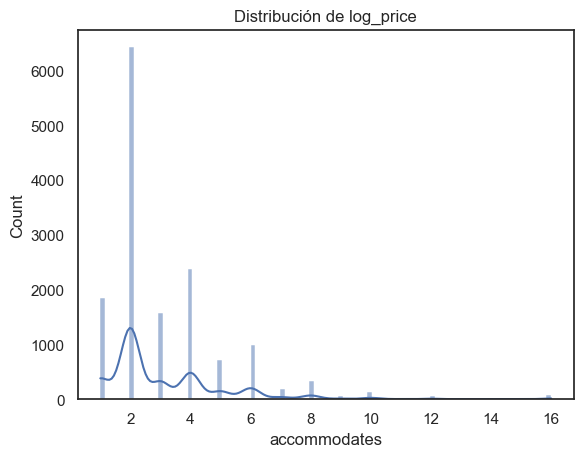

In [46]:
# Visualización de Distribucion es y Relaciones

sns.histplot(test['accommodates'], kde=True)
plt.title('Distribución de log_price')
plt.show()

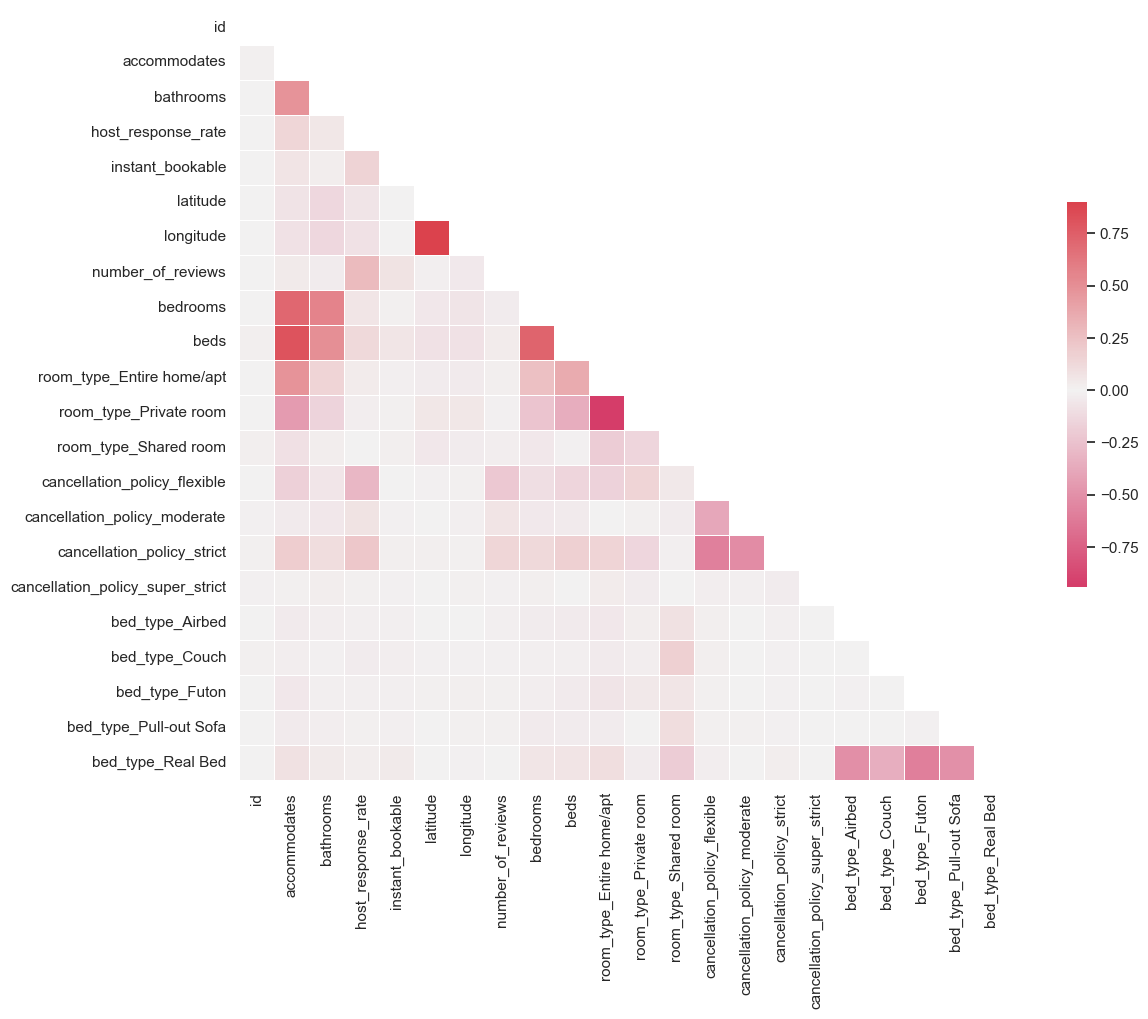

In [47]:
plt.figure(figsize=(15, 10))   # 150x100 pixeles

sns.set(style='white')    # estilo blanco

mask=np.triu(np.ones_like(test.corr(), dtype=bool))    # mascara para tapar lo de arriba

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de  colores


sns.heatmap(test.corr(),    
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=False,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [48]:
corr_price = test.corr()['accommodates']
corr_price

id                                  0.013777
accommodates                        1.000000
bathrooms                           0.480423
host_response_rate                  0.139538
instant_bookable                    0.066063
latitude                           -0.075725
longitude                          -0.083773
number_of_reviews                   0.041733
bedrooms                            0.709670
beds                                0.809640
room_type_Entire home/apt           0.478692
room_type_Private room             -0.451267
room_type_Shared room              -0.092768
cancellation_policy_flexible       -0.171123
cancellation_policy_moderate       -0.039774
cancellation_policy_strict          0.192226
cancellation_policy_super_strict    0.011716
bed_type_Airbed                    -0.041804
bed_type_Couch                     -0.026740
bed_type_Futon                     -0.055490
bed_type_Pull-out Sofa             -0.039882
bed_type_Real Bed                   0.085020
Name: acco

In [51]:
test.shape

(14823, 22)

In [49]:
test.head()

,id,accommodates,bathrooms,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,20332537,6,2,1.0,0,34.087167,-118.122115,7,3.0,4.0,1,0,0,0,1,0,0,0,0,0,0,1
1,10653901,4,1,1.0,0,33.994951,-118.467552,50,1.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1
2,21173707,1,1,1.0,0,37.794184,-122.405819,6,1.0,1.0,0,0,1,0,0,1,0,0,0,0,0,1
3,16861419,2,1,0.0,0,37.775893,-122.425973,0,1.0,1.0,0,1,0,1,0,0,0,0,0,0,0,1
4,16411627,4,1,1.0,0,42.348399,-71.156963,49,1.0,2.0,1,0,0,0,1,0,0,0,0,0,0,1


In [52]:
test.to_csv('test2.csv', index=False)

#### DIVISION DE LOS DATOS

In [ ]:
Divido el conjunto de entrenamiento (train) en conjuntos de entrenamiento(train_tr) y testeo (train_ts).
- Esto permitirá ajustar los hiperparámetros sin tocar el conjunto de prueba.

In [71]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score

In [74]:
# 1. División de datos
# Definir X e y 

X = test.drop('accommodates', axis=1)

y = test['accommodates']

In [75]:
X_train, X_test, y_train, y_test = tts(X, y,
                                    train_size=0.8,
                                    test_size=0.2,
                                    random_state=42
                                    )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11858, 21), (2965, 21), (11858,), (2965,))

In [76]:
# 2. Regresión Lineal

linreg = LinReg()  # Inicializa el modelo

linreg.fit(X_train, y_train)  # Ajusta el modelo

LinearRegression()

### Evaluación

In [77]:
from sklearn.metrics import mean_squared_error as mse  # error cuadratico medio

In [78]:
linreg.predict(X_test)[:10]

array([2.52957745, 1.97789697, 4.29124779, 6.92033028, 3.55900436,
       1.82339295, 2.84698487, 1.83801192, 1.6067823 , 2.68814299])

In [79]:
y_test.head()

14593     2
3154      2
5504      3
4817     10
3819      4
Name: accommodates, dtype: int64

In [80]:
# regresion lineal

y_pred = linreg.predict(X_test)

In [81]:
mse(y_test, y_pred, squared=False)   # RMSE squared=False por la raiz cuadrada

1.1434488304727528